In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
titanic = sns.load_dataset('titanic')

In [5]:
print(titanic.shape)

(891, 15)


In [6]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Data Cleaning

In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [11]:
titanic.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Detect and visualize missing values

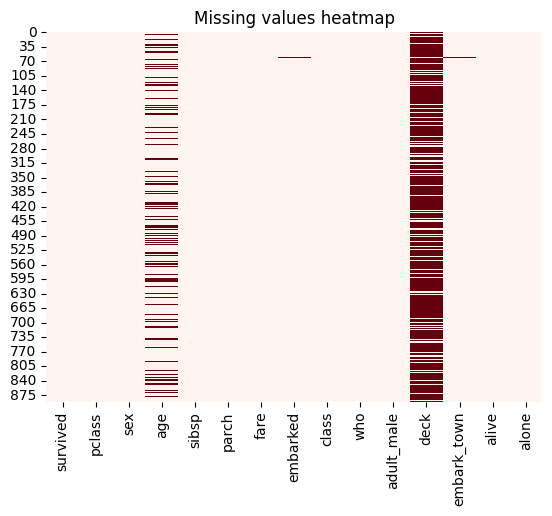

In [13]:
plt.Figure(figsize=(10, 5))
sns.heatmap(titanic.isnull(), cbar=False, cmap='Reds')
plt.title('Missing values heatmap')
plt.show()

Fill missing values

In [14]:
titanic['age'] = titanic.groupby('pclass')['age'].transform(lambda x: x.fillna(x.median()))


In [15]:
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)

C:\Users\Anik\AppData\Local\Temp\ipykernel_3472\3984909897.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)


In [16]:
titanic.drop(columns=['deck'], inplace=True)


In [17]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

Check for invalid data

In [18]:
titanic[titanic['fare'] <=0]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
179,0,3,male,36.0,0,0,0.0,S,Third,man,True,Southampton,no,True
263,0,1,male,40.0,0,0,0.0,S,First,man,True,Southampton,no,True
271,1,3,male,25.0,0,0,0.0,S,Third,man,True,Southampton,yes,True
277,0,2,male,29.0,0,0,0.0,S,Second,man,True,Southampton,no,True
302,0,3,male,19.0,0,0,0.0,S,Third,man,True,Southampton,no,True
413,0,2,male,29.0,0,0,0.0,S,Second,man,True,Southampton,no,True
466,0,2,male,29.0,0,0,0.0,S,Second,man,True,Southampton,no,True
481,0,2,male,29.0,0,0,0.0,S,Second,man,True,Southampton,no,True
597,0,3,male,49.0,0,0,0.0,S,Third,man,True,Southampton,no,True
633,0,1,male,37.0,0,0,0.0,S,First,man,True,Southampton,no,True


In [19]:
titanic.loc[titanic['fare'] <= 0, 'fare'] = titanic['fare'].median()

Data Transformation

In [20]:
bins = [0,12, 18, 35, 60, 80]
labels = ['child', 'teen', 'young', 'adult', 'senior']
titanic['age_group'] = pd.cut(titanic['age'], bins=bins, labels=labels)

In [21]:
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

In [22]:
titanic['alone'] = np.where(titanic['family_size'] == 1, 'Yes', 'No')

Encode categorical features

In [23]:
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['alone'] = titanic['alone'].map({'Yes': 1, 'No': 0})

In [24]:
titanic = pd.get_dummies(titanic, columns=['embarked', 'class'], drop_first=True)

Normalize skewed numeric data

In [25]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()
titanic[['age', 'fare']] = scaler.fit_transform(titanic[['age', 'fare']])

Data Visualization

Survival by Age Group

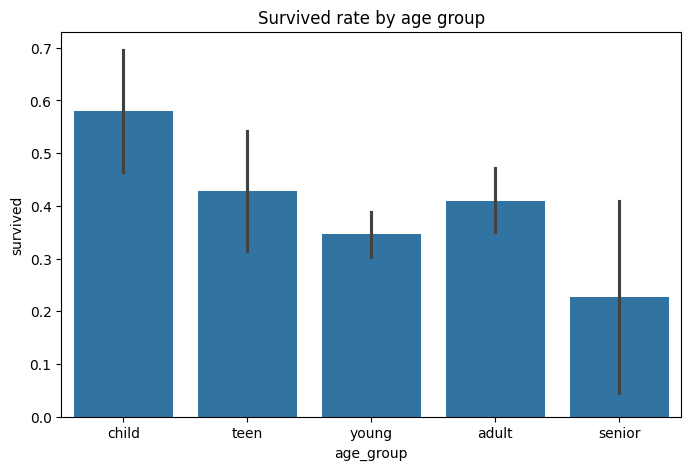

In [28]:
plt.figure(figsize=(8, 5))
sns.barplot(x='age_group', y='survived', data=titanic)
plt.title('Survived rate by age group')
plt.show()

Survival by Family Size

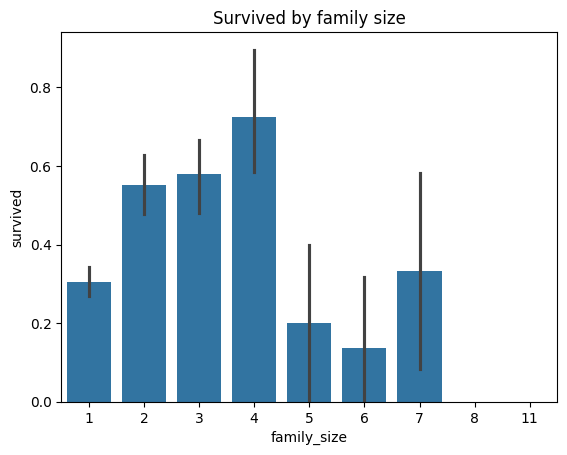

In [29]:
sns.barplot(x='family_size', y='survived', data=titanic)
plt.title('Survived by family size')
plt.show()

Pairplot

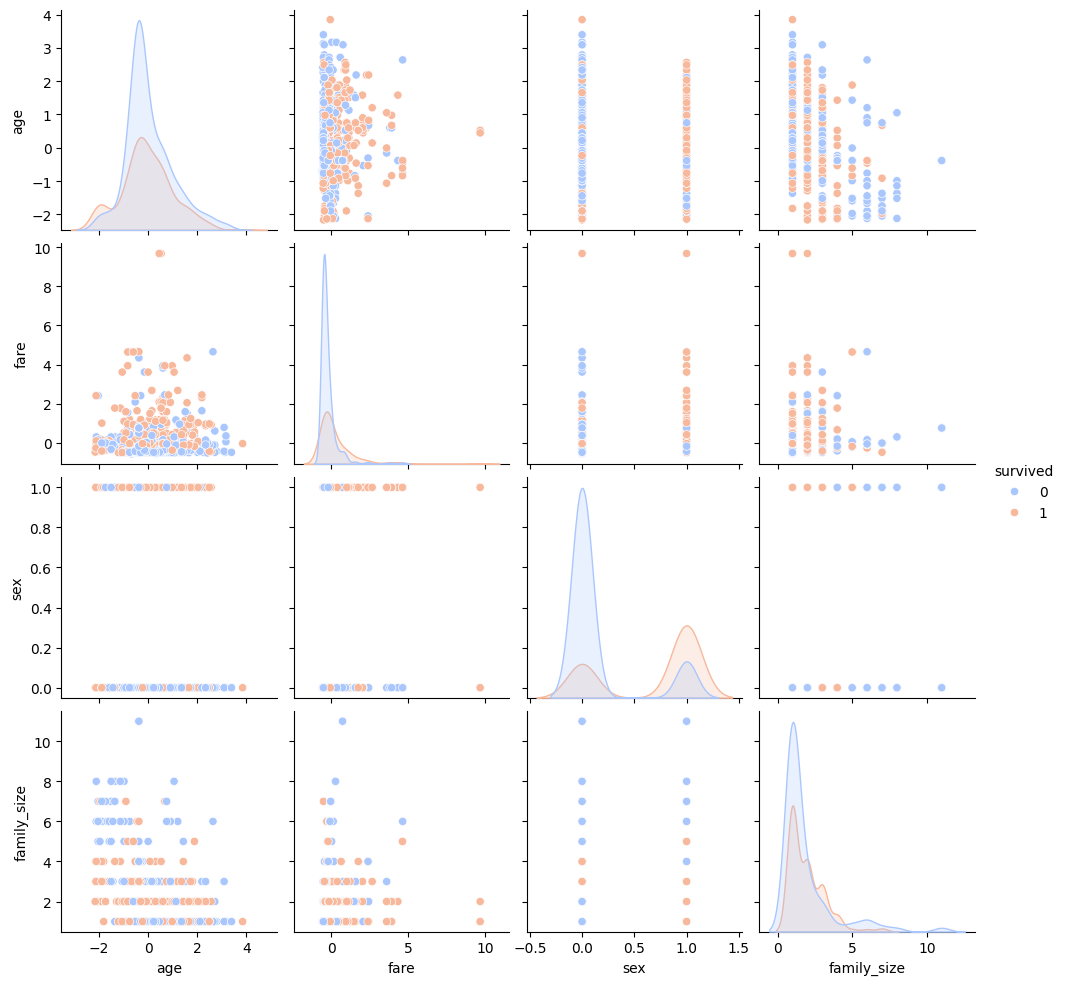

In [32]:
sns.pairplot(titanic[['survived','age','fare','sex','family_size']], hue='survived', palette='coolwarm')
plt.show()

Interactive Visualizations with Plotly

In [33]:
import plotly.express as px

Survival by Age & Fare

In [35]:
fig = px.scatter(titanic, x='age', y='fare', color='survived', 
                 title='Age vs Fare (Interactive)')
fig.show()

Interactive Box 

In [37]:
fig = px.bar(titanic, x='age_group', color='survived', 
             title='Interactive Survival by Age Group', 
             barmode='group')
fig.show()

In [38]:
fig = px.pie(titanic, names='age_group', title='Passenger Age Group Distribution')
fig.show()

Final data overview

In [39]:
print("Final cleaned shape:", titanic.shape)
titanic.head()

Final cleaned shape: (891, 18)


,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alive,alone,age_group,family_size,embarked_Q,embarked_S,class_Second,class_Third
0,0,3,0,-0.533834,1,0,-0.508606,man,True,Southampton,no,0,young,2,False,True,False,True
1,1,1,1,0.674891,1,0,0.783889,woman,False,Cherbourg,yes,0,adult,2,False,False,False,False
2,1,3,1,-0.231653,0,0,-0.494981,woman,False,Southampton,yes,1,young,1,False,True,False,True
3,1,1,1,0.448255,1,0,0.416864,woman,False,Southampton,yes,0,young,2,False,True,False,False
4,0,3,0,0.448255,0,0,-0.492458,man,True,Southampton,no,1,young,1,False,True,False,True
